In [ ]:
# installing the Yahoo Finance Library
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importing libraries to the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# finance dependencies
import pandas_datareader.data as web
import yfinance as yf

# importing machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

plt.style.use('default')

In [ ]:
# allows pandas_datareader to get yahoo data (returns dataframe)
yf.pdr_override()

In [ ]:
# setting start and end dates
start_date = "2015-01-01"
end_date = "2020-06-01"

In [ ]:
# loading IBOV Index data inside a dataframe
df_ibov = web.get_data_yahoo('^BVSP', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#get the close price
df = df_ibov[['Close']]

In [ ]:
# Quantos dias queremos prever para a predição
forecast_in_days = 90;

#criar uma nova coluna (alvo/variavel dependente Y)
df['Prediction'] = df[['Close']].shift(-forecast_in_days)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# criar a variavel dependente (X)
X = np.array(df.drop(['Prediction'], axis=1))

# remover os ultimos 'forecast_in_days' do array (para não termos os NaN)
X = X[:-forecast_in_days]

In [ ]:
# criar a variavel dependente (Y)
# converter primeiro para um array numpy (virá com todos os NaN's)
y = np.array(df['Prediction'])

# remover os ultimos 'forecast_in_days' do array (para não termos os NaN)
y = y[:-forecast_in_days]

In [ ]:
# dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# criar uma variavel de forecast igual a (forecast_in_days) data para a predição
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast_in_days: ]

# Trainamento dos Modelos



## Linear Regression

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# testando o modelo: Score - Coef. de Determinação R² (best = 1.0)
confidence_lr = lr.score(X_test, y_test)
print(confidence_lr)

0.7248466244493075


In [ ]:
# fazer a predição para os proximos (forecast_in_days) dias
lr_pred = lr.predict(x_forecast)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


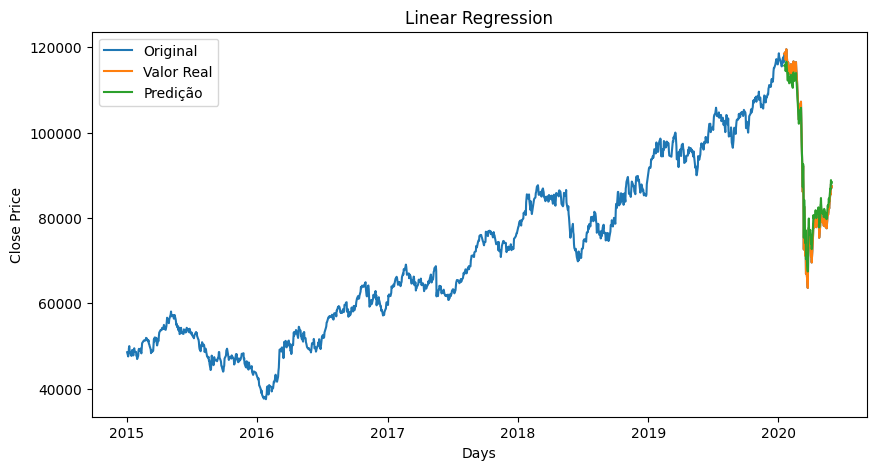

In [ ]:
# visualize the data (Linear Regression)
predictions = lr_pred

# Plot Linear Regression
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,5))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'][0:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valor Real', 'Predição'])
plt.show()

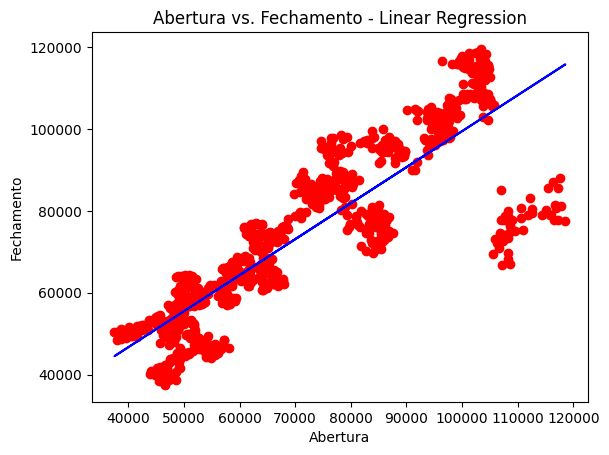

In [ ]:
# Base de Treino
# Comparar o fechamento real com o fechamento predito pelo modelo (Base de Treino 20%)
plt.style.use('default')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Abertura vs. Fechamento - Linear Regression')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_fcst = StandardScaler()
X2 = sc_X.fit_transform(X)
y2 = sc_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# dividir os dados em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [ ]:
# Support Vector Regressor
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# testando o modelo: Score - Coef. de Determinação R² (best = 1.0)
confidence_svr_linear = svr_linear.score(X_test, y_test)
print(confidence_svr_linear)

0.6861290981986153


In [ ]:
# fazer a predição para os proximos (forecast_in_days) dias
svr_linear_pred = svr_linear.predict(sc_X.fit_transform(x_forecast))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


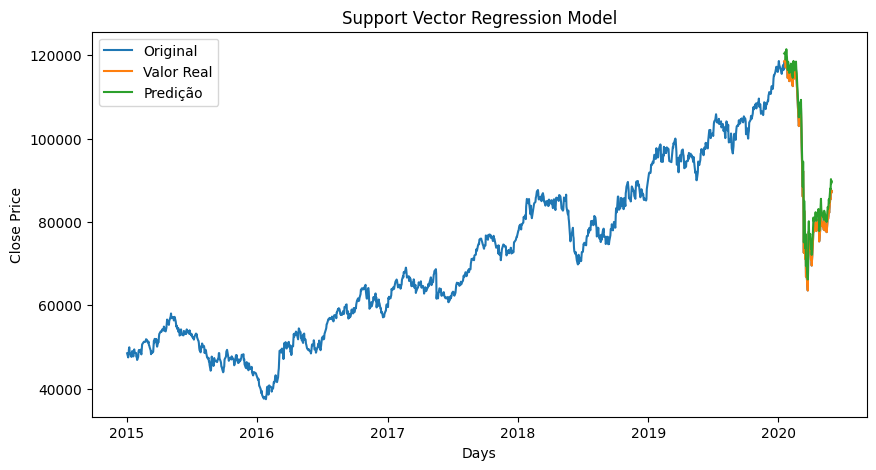

In [ ]:
# visualize the data (Support Vector Regressor Model)
predictions = sc_X.inverse_transform(svr_linear_pred)

# Plot Support Vector Regression Model
valid = (df[X.shape[0]:])
valid['Predictions'] = (predictions)
plt.figure(figsize=(10,5))
plt.title('Support Vector Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'][0:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valor Real', 'Predição'])
plt.show()

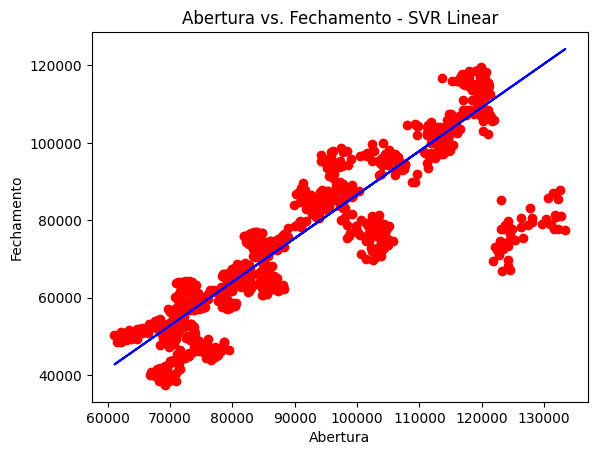

In [ ]:
# Base de Treino
# Comparar o fechamento real com o fechamento predito pelo modelo (Base de Treino 20%)
plt.style.use('default')
plt.scatter(sc_X.inverse_transform(X_train),sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(svr_linear.predict(X_train)), color='blue')
plt.title('Abertura vs. Fechamento - SVR Linear')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()